In [35]:
# """
# Problem Statement
# Using the provided attrition data from the bank, generate a model that predicts customer attrition.

# Findings Summary
# Using Random Forest Classification with one hot encoding for categorical data, we're able to achieve
# an accuracy rating of 96.10% based on a train/test/split sampling with 20% split (20% of the data reserved
# for testing and 80% for training).

# Future Iteration Goals
# Further validate accuracy with cross validation
# Further tune model with XGBoost
# Add further detailed commentary on charts and data exploration
# Notes
# The cleanliness of this data really made this project enjoyable and
# able to stay focused on the exploration/modeling. My goal in this notebook 
# was to approach a data set different from most I've used in learning but still 
# apply some of the tools I've gained from the Kaggle courses.

# """

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Attrition_Flag']=le.fit_transform(df['Attrition_Flag'])
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,0,41,1,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,0,44,0,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,0,30,1,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
df['nnn'] = df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'] 
df['mmm'] = df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [6]:
y=df['Attrition_Flag']

x=df.drop(['Attrition_Flag','CLIENTNUM',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],
         axis=1)

In [7]:
print(x.shape)
x.head()

(10127, 21)


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,nnn,mmm
0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
num_cols=[col for col in x.columns if x[col].dtype in ['int64','float64']and x[col].nunique()>10]
cat_cols=[ col for col in x.columns if x[col].nunique()<10 or x[col].dtype == 'object']
my_cols = num_cols + cat_cols
len(my_cols)

21

In [9]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.00000
Gender,10127.0,0.470919,0.499178,0.000000,0.000000,0.000000,1.000000,1.00000
Dependent_count,10127.0,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.00000
Months_on_book,10127.0,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.00000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.00000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.00000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.00000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.00000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.00000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.00000


In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  int32  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [11]:
df['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [12]:
#sns.pairplot(df)

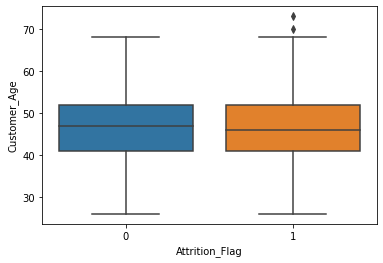

In [13]:
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)

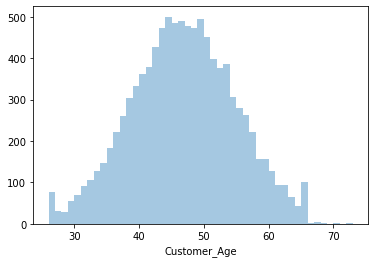

In [14]:
sns.distplot(df['Customer_Age'],kde=False )

Graph for Gender : 2 categories


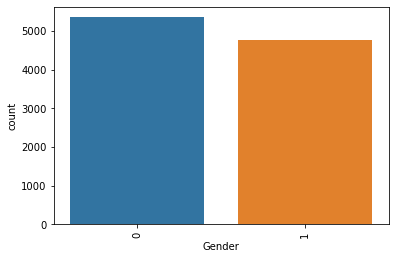

Graph for Dependent_count : 6 categories


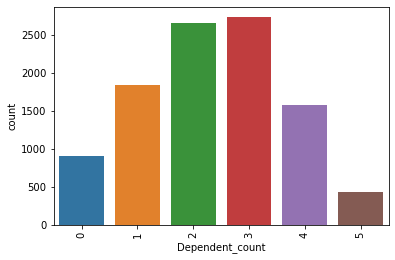

Graph for Education_Level : 7 categories


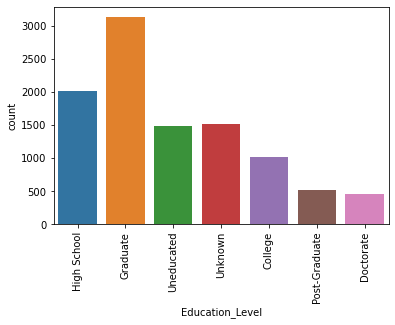

Graph for Marital_Status : 4 categories


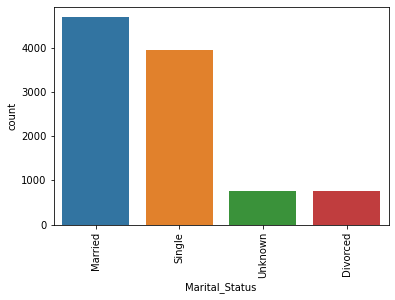

Graph for Income_Category : 6 categories


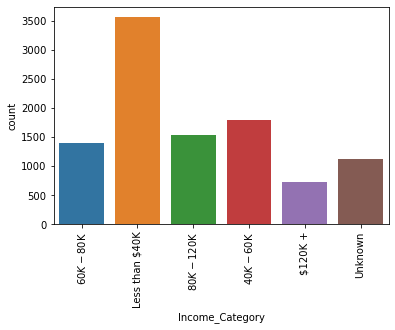

Graph for Card_Category : 4 categories


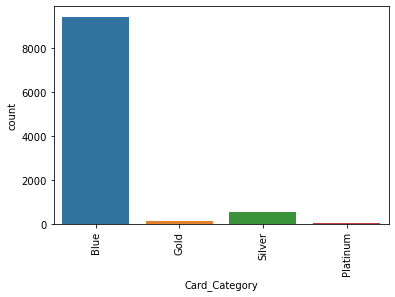

Graph for Total_Relationship_Count : 6 categories


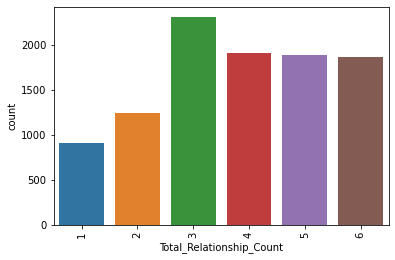

Graph for Months_Inactive_12_mon : 7 categories


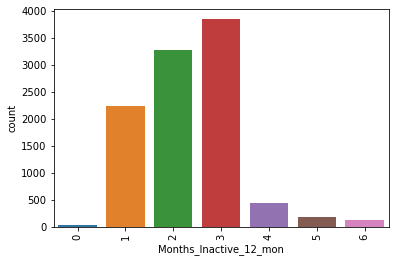

Graph for Contacts_Count_12_mon : 7 categories


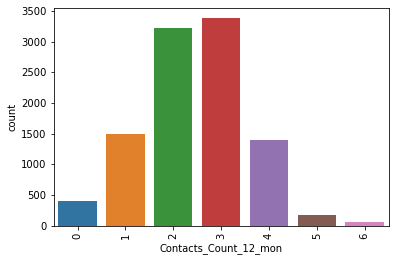

In [15]:
for i in cat_cols:
    print(f'Graph for {i} : {df[i].nunique()} categories')
    chart=sns.countplot(df[i])
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()
    

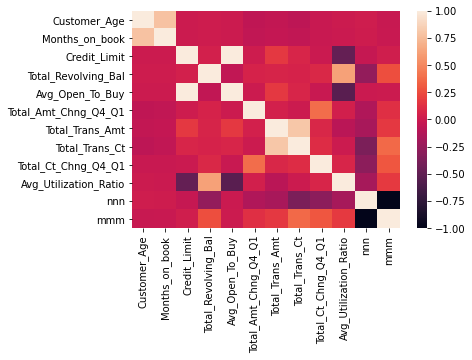

In [16]:
sns.heatmap(df[num_cols].corr())

In [17]:
for col in cat_cols:
    print(f'{col} : {df[col].nunique()}')

Gender : 2
Dependent_count : 6
Education_Level : 7
Marital_Status : 4
Income_Category : 6
Card_Category : 4
Total_Relationship_Count : 6
Months_Inactive_12_mon : 7
Contacts_Count_12_mon : 7


In [18]:
x[cat_cols]

,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
0,1,3,High School,Married,$60K - $80K,Blue,5,1,3
1,0,5,Graduate,Single,Less than $40K,Blue,6,1,2
2,1,3,Graduate,Married,$80K - $120K,Blue,4,1,0
3,0,4,High School,Unknown,Less than $40K,Blue,3,4,1
4,1,3,Uneducated,Married,$60K - $80K,Blue,5,1,0
...,...,...,...,...,...,...,...,...,...
10122,1,2,Graduate,Single,$40K - $60K,Blue,3,2,3
10123,1,2,Unknown,Divorced,$40K - $60K,Blue,4,2,3
10124,0,1,High School,Married,Less than $40K,Blue,5,3,4
10125,1,2,Graduate,Unknown,$40K - $60K,Blue,4,3,3


In [19]:
ohe=OneHotEncoder(sparse=False)
sc= StandardScaler()
le=LabelEncoder()

In [27]:
rfc = RandomForestClassifier(random_state=0)
lr = LogisticRegression()

ct = make_column_transformer(
                            (ohe,cat_cols),
                            (sc,num_cols),
                            remainder='passthrough'
                            )
pipe = make_pipeline(ct,rfc)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, test_size=0.30, random_state=1)

In [22]:
cross_val_score(pipe, x_train, y_train, cv=5, scoring='accuracy').mean()

1.0

In [23]:
pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['Gender', 'Dependent_count',
                                                   'Education_Level',
                                                   'Marital_Status'...
                 RandomForestClassifier(b

In [24]:
y_pred = pipe.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

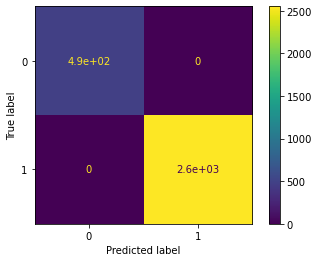

In [25]:
plot_confusion_matrix(pipe, x_test, y_test)
plt.show()

In [30]:
pipe2 = make_pipeline(ct,lr)

cross_val_score(pipe2, x_train, y_train, cv=5, scoring='accuracy').mean()

1.0

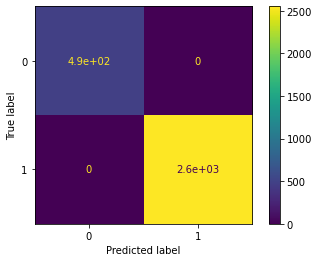

In [33]:
pipe2.fit(x_train, y_train)
plot_confusion_matrix(pipe2, x_test, y_test)
plt.show()